In [1]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt

# Carregando os dados
data = pd.read_csv("https://raw.githubusercontent.com/edusantosgoncalves/SCR_modelos/main/DataSetForSCR_Final.csv", encoding="unicode_escape")
data = data[data["Label"] == "SCR"]  # Filtrando somente as linhas que sejam SCRs
sentencas = data["Sentence"]
sentencas = sentencas.apply(lambda x: x.lower()) # Deixando todas as letras minúsculas
labels = data["Label"]

In [2]:
# Pré-processamento
stop_words = set(stopwords.words("english"))  # Obtendo conjunto de stopwords

sentencas_limpas = []
for frase in sentencas:
    tokens = word_tokenize(frase.lower())  # Colocando em minusculo e tokenizando
    tokens = [token for token in tokens if token.isalpha()]  # Removendo pontuações
    tokens = [token for token in tokens if token not in stop_words]  # Removendo stopwords
    sentencas_limpas.append(" ".join(tokens))  # Juntando os tokens em uma frase

In [3]:
# Calculando o CountVectorizer TF-IDF
count_vect = CountVectorizer()#stop_words="english")
tfidf_vect = TfidfVectorizer()#stop_words="english")
count_matrix = count_vect.fit_transform(sentencas_limpas)
tfidf_matriz = tfidf_vect.fit_transform(sentencas_limpas)

In [4]:
# Obtendo as palavras junto aos valores
count_feature_names = count_vect.get_feature_names_out()
tfidf_feature_names = tfidf_vect.get_feature_names_out()
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_feature_names)
tfidf_df = pd.DataFrame(tfidf_matriz.toarray(), columns=tfidf_feature_names)

In [5]:
# Definindo a qtd de palavras a serem obtidas
top_n = 10

# Somando as pontuações para cada palavra e classificando-as
sum_tfidf = tfidf_df.sum(axis=0)
top_words_tfidf = sum_tfidf.sort_values(ascending=False).head(
    top_n
)  # Obtemos as n palavras mais relevantes

sum_count = count_df.sum(axis=0)
top_words_count = sum_count.sort_values(ascending=False).head(
    top_n
)  # Obtemos as n palavras mais relevantes

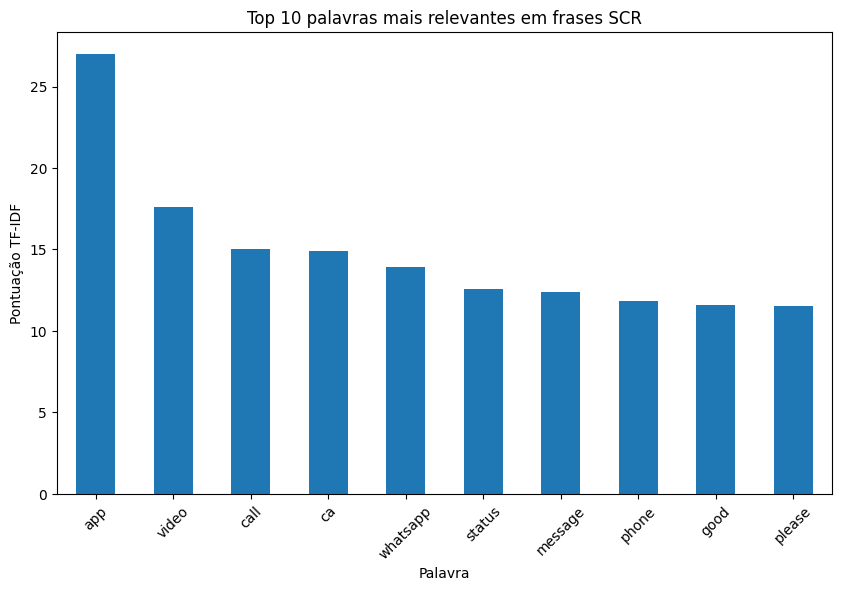

In [6]:
# Plotando a relevancia das n palavras
plt.figure(figsize=(10, 6))
top_words_tfidf.plot(kind="bar")
plt.title(f"Top {top_n} palavras mais relevantes em frases SCR")
plt.xlabel("Palavra")
plt.ylabel("Pontuação TF-IDF")
plt.xticks(rotation=45)
plt.show()

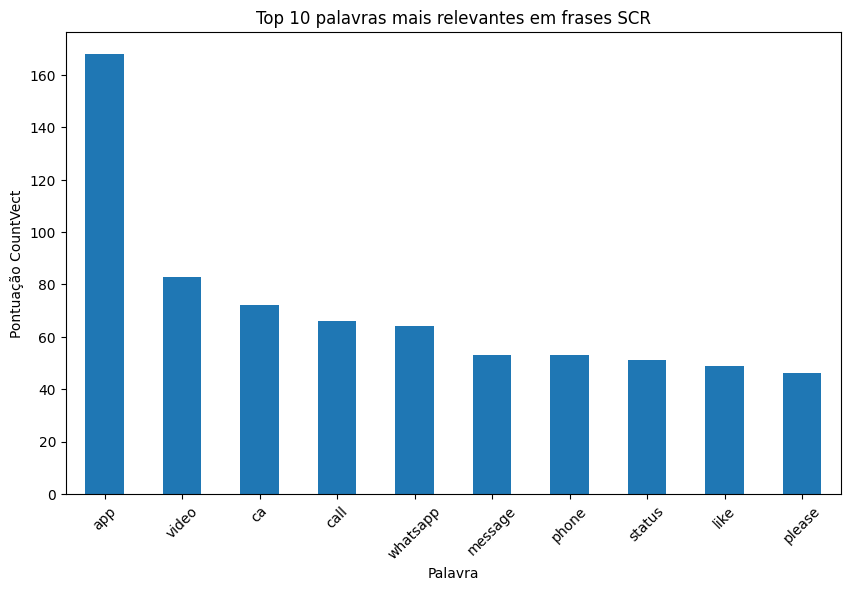

In [7]:
# Plotando a relevancia das n palavras
plt.figure(figsize=(10, 6))
top_words_count.plot(kind="bar")
plt.title(f"Top {top_n} palavras mais relevantes em frases SCR")
plt.xlabel("Palavra")
plt.ylabel("Pontuação CountVect")
plt.xticks(rotation=45)
plt.show()